In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
taxi = pd.read_csv('/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/3_taxi_peru.csv', parse_dates=['start_at', 'end_at','arrived_at' ] , sep = ';')

In [21]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [22]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [23]:
peru_taxi_sources = taxi[['journey_id','source']] \
    .groupby('source',as_index=False) \
    .agg({"journey_id":"count"}) \
    .rename(columns={"journey_id":"journeys_count"}) \
    .sort_values(by=['journeys_count'],ascending=False)
peru_taxi_sources

,source,journeys_count
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [24]:
# Самый популярный источник заказов - Iphone 

In [25]:
# Выразим в процентном соотношении долю каждого источника:

In [26]:
peru_taxi_sources['source_rate'] = peru_taxi_sources['journeys_count'] / peru_taxi_sources.journeys_count.sum() * 100
peru_taxi_sources

,source,journeys_count,source_rate
3,iPhone,9741,42.374282
4,web,7631,33.195580
0,Android,4909,21.354620
2,iPad,571,2.483905
1,Wap,136,0.591613


In [27]:
# Визуализируем количестов заказов с каждого источника:

<AxesSubplot:xlabel='source', ylabel='journeys_count'>

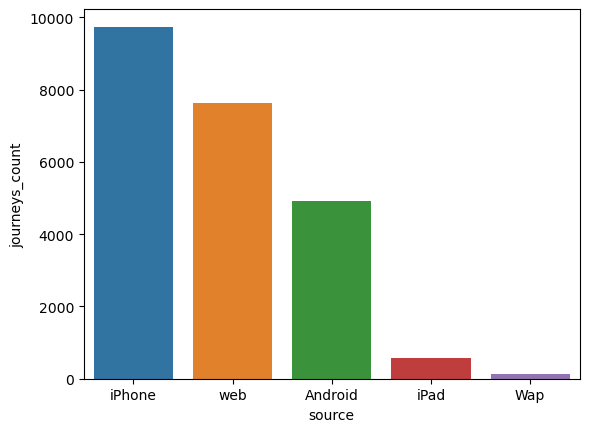

In [28]:
sns.barplot(data=peru_taxi_sources, x="source", y="journeys_count")

<AxesSubplot:xlabel='source', ylabel='count'>

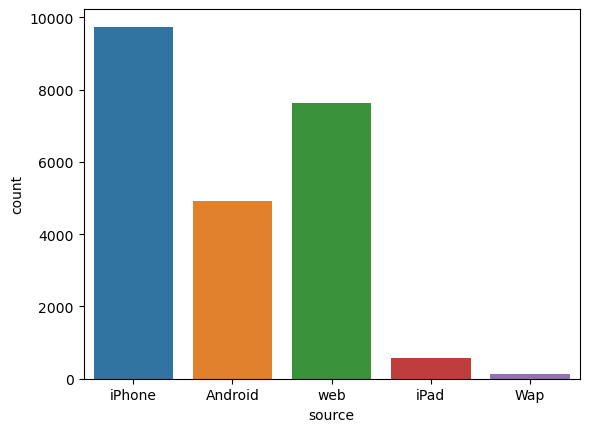

In [29]:
sns.countplot(data = taxi, x = 'source')

In [30]:
# Визуализируем заказы с каждого источника с распределением по статусам:

<AxesSubplot:xlabel='source', ylabel='count'>

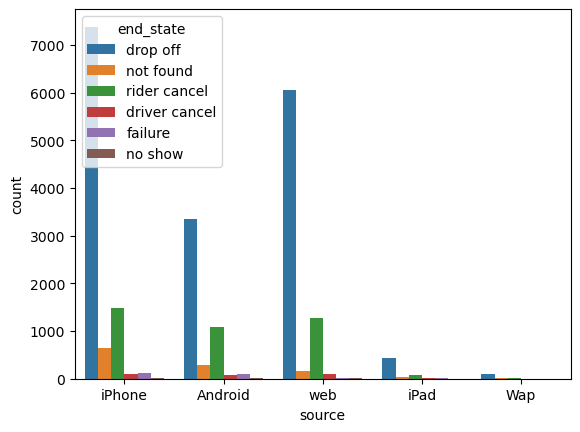

In [31]:
sns.countplot(data = taxi, x = 'source', hue = 'end_state' )

In [32]:
# Проверим, как распределены оценки водителей (driver_score). Посчитаем частоту встречаемости оценок:

In [37]:
driver_score_rate = taxi[['journey_id','driver_score']] \
    .groupby('driver_score',as_index=False) \
    .agg({"journey_id":"count"}) \
    .rename(columns={"journey_id":"driver_scores_count"}) \
    .sort_values(by=['driver_scores_count'],ascending=False)
driver_score_rate

,driver_score,driver_scores_count
5,5.0,4499
4,4.0,1674
0,0.0,1094
3,3.0,227
1,1.0,94
2,2.0,62


In [44]:
driver_score_rate['percentage'] = driver_score_rate.driver_scores_count / driver_score_rate.driver_scores_count.sum()
driver_score_rate.percentage = driver_score_rate.percentage.mul(100).round(2)


In [46]:
driver_score_percentage = driver_score_rate.sort_values(by = ['driver_score'])
driver_score_percentage

,driver_score,driver_scores_count,percentage
0,0.0,1094,14.30
1,1.0,94,1.23
2,2.0,62,0.81
3,3.0,227,2.97
4,4.0,1674,21.88
5,5.0,4499,58.81


In [47]:
# Строим график:

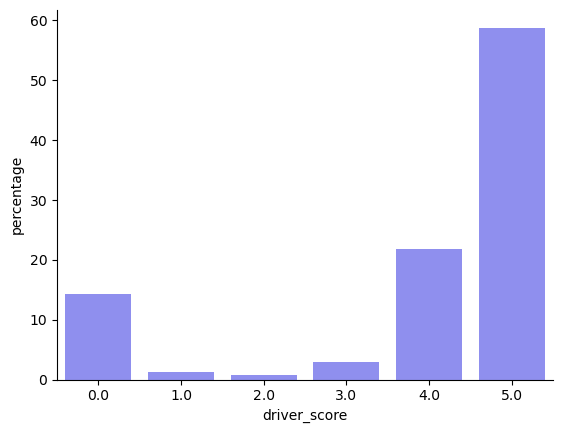

In [59]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_percentage, color='blue', alpha=0.5)
sns.despine()  # убрать часть рамки графика



In [60]:
# Проанализируем оценки пассажирам rider_score:

In [61]:
rider_score_rate = taxi[['journey_id','rider_score']] \
    .groupby('rider_score',as_index=False) \
    .agg({"journey_id":"count"}) \
    .rename(columns={"journey_id":"rider_scores_count"}) \
    .sort_values(by=['rider_scores_count'],ascending=False)
rider_score_rate

,rider_score,rider_scores_count
5,5.0,13404
4,4.0,1359
0,0.0,352
3,3.0,213
1,1.0,32
2,2.0,30


In [63]:
rider_score_rate['percentage'] = rider_score_rate.rider_scores_count / rider_score_rate.rider_scores_count.sum()
rider_score_rate.percentage = rider_score_rate.percentage.mul(100).round(2)
rider_score_rate

,rider_score,rider_scores_count,percentage
5,5.0,13404,87.10
4,4.0,1359,8.83
0,0.0,352,2.29
3,3.0,213,1.38
1,1.0,32,0.21
2,2.0,30,0.19


In [64]:
rider_score_percentage = rider_score_rate.sort_values(by = ['rider_score'])
rider_score_percentage

,rider_score,rider_scores_count,percentage
0,0.0,352,2.29
1,1.0,32,0.21
2,2.0,30,0.19
3,3.0,213,1.38
4,4.0,1359,8.83
5,5.0,13404,87.10


In [65]:
# Строим график:

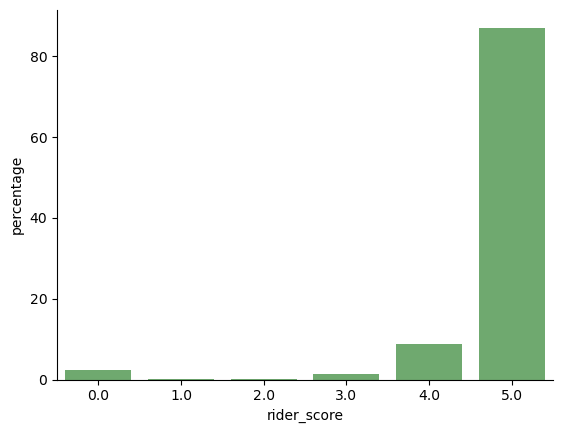

In [69]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_percentage, color='green', alpha=0.6)
sns.despine()  # убрать часть рамки графика

In [70]:
# Водители чаще ставят оценки своим пассажирам, чем наоборот. 96% оценок от водителей "4" или "5". 
# Оценки "1", "2", "3" - встречаются крайне редко.
# Пассажиры же чаще оценивают водителя "0" - почти в 15% случаев. 2 место по полуярности - оценка "4" - почти 22%.
# Видимо, для клиентов, один из способов выразить недовольство работой водителя - поставить ему "0"